In [1]:
import cv2
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import matplotlib.pyplot as plt
from ultralytics import YOLO
import argparse
import torch
import numpy as np
from PIL import Image


In [2]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

MODEL_TYPE = "vit_h"

In [3]:
model = YOLO('yolov9e-seg.pt')

In [4]:
results = model.predict(source='car2.jpg')


image 1/1 c:\Users\rinsh\OneDrive\Desktop\candy\candyprog\sam\car2.jpg: 384x640 18 cars, 11 trucks, 956.2ms
Speed: 2.8ms preprocess, 956.2ms inference, 26.2ms postprocess per image at shape (1, 3, 384, 640)


In [5]:
for result in results:
    boxes = result.boxes
bbox = boxes.xyxy.tolist()

In [6]:
print(bbox)

[[445.95281982421875, 386.1955261230469, 528.443115234375, 448.6872863769531], [53.20001220703125, 345.5750427246094, 157.65634155273438, 442.27703857421875], [773.0040283203125, 440.1857604980469, 874.1743774414062, 505.31427001953125], [639.6006469726562, 367.2351379394531, 730.8987426757812, 437.19830322265625], [454.3109130859375, 294.8665466308594, 514.8291015625, 339.80621337890625], [650.834716796875, 313.88092041015625, 711.27685546875, 357.9727478027344], [177.28811645507812, 262.9768371582031, 236.56692504882812, 309.026123046875], [520.5068359375, 110.7069091796875, 548.6080322265625, 137.5914764404297], [561.5799560546875, 323.16046142578125, 631.8565673828125, 381.0135803222656], [601.280029296875, 443.263427734375, 696.5728149414062, 505.3603210449219], [293.2479553222656, 398.79254150390625, 399.9535827636719, 492.6095886230469], [391.094482421875, 215.91000366210938, 428.5334777832031, 247.4584503173828], [609.7273559570312, 243.00448608398438, 652.925048828125, 274.784

In [7]:
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

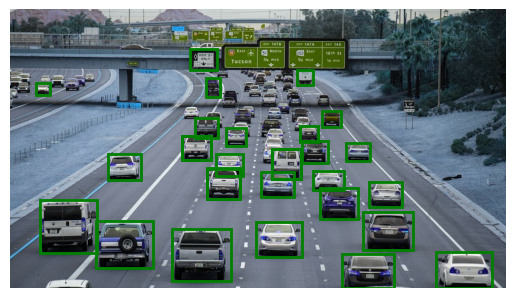

In [8]:

img = cv2.imread("car2.jpg")
plt.imshow(img)

for i in bbox:
    box = np.array(i)

    show_box(box, plt.gca())
plt.axis('off')
plt.show()

In [9]:
sam = sam_model_registry[MODEL_TYPE](checkpoint=r"C:\Users\rinsh\OneDrive\Desktop\candy\candyprog\sam\sam_vit_h_4b8939.pth")


im = Image.open("car.jpg")

hwc = np.array(im)
hwc

array([[[237, 210, 163],
        [240, 213, 166],
        [244, 217, 170],
        ...,
        [ 70,  72,  35],
        [ 72,  74,  34],
        [ 82,  83,  41]],

       [[241, 213, 165],
        [242, 214, 166],
        [244, 216, 168],
        ...,
        [ 73,  75,  36],
        [ 77,  78,  36],
        [ 88,  87,  43]],

       [[243, 213, 161],
        [243, 213, 161],
        [245, 215, 165],
        ...,
        [ 76,  75,  31],
        [ 79,  78,  30],
        [ 90,  88,  39]],

       ...,

       [[ 58,  61,  76],
        [ 59,  62,  77],
        [ 57,  63,  75],
        ...,
        [ 46,  54,  57],
        [ 46,  54,  57],
        [ 47,  55,  58]],

       [[ 59,  63,  75],
        [ 60,  64,  76],
        [ 57,  63,  75],
        ...,
        [ 47,  55,  58],
        [ 46,  54,  57],
        [ 46,  54,  57]],

       [[ 62,  66,  77],
        [ 63,  67,  78],
        [ 61,  68,  78],
        ...,
        [ 49,  57,  60],
        [ 48,  56,  59],
        [ 46,  54,  57]]

In [10]:
def show_mask(mask, ax):
    color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

In [11]:

mask_predictor = SamPredictor(sam)

image_bgr = cv2.imread("car.jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
mask_predictor.set_image(image_rgb)
    

In [12]:
plt.imshow(img)

for i in bbox:
    box = np.array(i)
    mask, scores, logits = mask_predictor.predict(
        box=box,
        multimask_output=False
    )

    show_mask(mask, plt.gca())
    show_box(box, plt.gca())
plt.axis('off')
plt.show()